# Hospital Data Visualization 5

## Importing required libraries

In [33]:
import pandas as pd
import seaborn as sns
import chardet
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# Library to see the training models
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import warnings
warnings.filterwarnings('ignore')
# look at the first ten thousand bytes to guess the character encoding
with open('05.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


## Reading the Data

In [34]:
df=pd.read_csv('05.csv',encoding='ISO-8859-1',sep=';')

In [35]:
df.head(15)

PATIENT ID  DIA_PPAL DIA_02 DIA_03  DIA_04 DIA_05 DIA_06 DIA_07 DIA_08  \
0           47     J12.9    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
1           48     J98.8    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
2           49     I50.9    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
3           50     J98.4  N39.0    NaN     NaN    NaN    NaN    NaN    NaN   
4           51     J18.9    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
5           52     J98.8  B99.9    NaN     NaN    NaN    NaN    NaN    NaN   
6           53     J98.8    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
7           54    I26.99    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
8           55     J84.9    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
9           56    R68.89  J98.8    NaN     NaN    NaN    NaN    NaN    NaN   
10          57  T38.0X5A  D84.8  J18.9     NaN    NaN    NaN    NaN    NaN   
11          58     J18.9    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
12          59     N39.0    F05  J98.8  J96.91  A41.9    NaN    NaN    NaN   
13          61     J44.1  E87.1  J18.9  J96.90    NaN    NaN    NaN    NaN   
14          62    R68.89  B34.2  J18.9     NaN    NaN    NaN    NaN    NaN   

   DIA_09 DIA_10  DIA_11  DIA_12  PROC_01 PROC_02 PROC_03  PROC_04  PROC_05  
0     NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
1     NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
2     NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
3     NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
4     NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
5     NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
6     NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
7     NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
8     NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
9     NaN    NaN     NaN     NaN  BW03ZZZ     NaN     NaN      NaN      NaN  
10    NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
11    NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
12    NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
13    NaN    NaN     NaN     NaN      NaN     NaN     NaN      NaN      NaN  
14    NaN    NaN     NaN     NaN  BW03ZZZ     NaN     NaN      NaN      NaN

## Checking the Data

In [36]:
df.describe()

PATIENT ID  DIA_11  DIA_12  PROC_04  PROC_05
count  1987.000000     0.0     0.0      0.0      0.0
mean   1172.550579     NaN     NaN      NaN      NaN
std     666.443779     NaN     NaN      NaN      NaN
min      47.000000     NaN     NaN      NaN      NaN
25%     609.000000     NaN     NaN      NaN      NaN
50%    1158.000000     NaN     NaN      NaN      NaN
75%    1736.500000     NaN     NaN      NaN      NaN
max    2321.000000     NaN     NaN      NaN      NaN

In [37]:
df.shape

(1987, 18)

In [38]:
#Values NaN
df.isnull().sum().sort_values(ascending=False)

PROC_05       1987
DIA_11        1987
PROC_04       1987
DIA_12        1987
DIA_10        1986
DIA_09        1984
DIA_08        1980
PROC_03       1976
DIA_07        1973
DIA_06        1965
DIA_05        1938
PROC_02       1935
DIA_04        1868
PROC_01       1838
DIA_03        1705
DIA_02        1184
DIA_PPAL         0
PATIENT ID       0
dtype: int64

We see that there are too many missing values ​​so we cannot choose to fill it, so we directly visualize by number of occurrences.

In [39]:
# % Values NaN
df.isnull().sum().sort_values(ascending=False)/len(df.index)*100

PROC_05       100.000000
DIA_11        100.000000
PROC_04       100.000000
DIA_12        100.000000
DIA_10         99.949673
DIA_09         99.849019
DIA_08         99.647710
PROC_03        99.446402
DIA_07         99.295420
DIA_06         98.892803
DIA_05         97.533971
PROC_02        97.382989
DIA_04         94.011072
PROC_01        92.501258
DIA_03         85.807750
DIA_02         59.587318
DIA_PPAL        0.000000
PATIENT ID      0.000000
dtype: float64

In [40]:
# % de 0 en las variables
print(df[df == 0].count(axis=0)/len(df.index)*100)

PATIENT ID    0.0
DIA_PPAL      0.0
DIA_02        0.0
DIA_03        0.0
DIA_04        0.0
DIA_05        0.0
DIA_06        0.0
DIA_07        0.0
DIA_08        0.0
DIA_09        0.0
DIA_10        0.0
DIA_11        0.0
DIA_12        0.0
PROC_01       0.0
PROC_02       0.0
PROC_03       0.0
PROC_04       0.0
PROC_05       0.0
dtype: float64


According to the exploration, we see that few people have requested more tests so they have not needed more procedures.

## Feature Exploration

In [41]:
# We eliminate these variables with 100% NaN
df.drop(['PROC_05','DIA_12','PROC_04','DIA_11'],axis=1, inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 14 columns):
PATIENT ID    1987 non-null int64
DIA_PPAL      1987 non-null object
DIA_02        803 non-null object
DIA_03        282 non-null object
DIA_04        119 non-null object
DIA_05        49 non-null object
DIA_06        22 non-null object
DIA_07        14 non-null object
DIA_08        7 non-null object
DIA_09        3 non-null object
DIA_10        1 non-null object
PROC_01       149 non-null object
PROC_02       52 non-null object
PROC_03       11 non-null object
dtypes: int64(1), object(13)
memory usage: 217.4+ KB


In [43]:
# Decide which categorical variables you want to use in model
for col_name in df.columns:
    if df[col_name].dtypes == 'object' :
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(
                col_name=col_name, unique_cat=unique_cat))

Feature 'DIA_PPAL' has 184 unique categories
Feature 'DIA_02' has 159 unique categories
Feature 'DIA_03' has 99 unique categories
Feature 'DIA_04' has 76 unique categories
Feature 'DIA_05' has 44 unique categories
Feature 'DIA_06' has 22 unique categories
Feature 'DIA_07' has 13 unique categories
Feature 'DIA_08' has 8 unique categories
Feature 'DIA_09' has 4 unique categories
Feature 'DIA_10' has 2 unique categories
Feature 'PROC_01' has 12 unique categories
Feature 'PROC_02' has 9 unique categories
Feature 'PROC_03' has 8 unique categories


In [44]:
dib = df.copy()

In [45]:
df.head(15)

PATIENT ID  DIA_PPAL DIA_02 DIA_03  DIA_04 DIA_05 DIA_06 DIA_07 DIA_08  \
0           47     J12.9    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
1           48     J98.8    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
2           49     I50.9    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
3           50     J98.4  N39.0    NaN     NaN    NaN    NaN    NaN    NaN   
4           51     J18.9    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
5           52     J98.8  B99.9    NaN     NaN    NaN    NaN    NaN    NaN   
6           53     J98.8    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
7           54    I26.99    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
8           55     J84.9    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
9           56    R68.89  J98.8    NaN     NaN    NaN    NaN    NaN    NaN   
10          57  T38.0X5A  D84.8  J18.9     NaN    NaN    NaN    NaN    NaN   
11          58     J18.9    NaN    NaN     NaN    NaN    NaN    NaN    NaN   
12          59     N39.0    F05  J98.8  J96.91  A41.9    NaN    NaN    NaN   
13          61     J44.1  E87.1  J18.9  J96.90    NaN    NaN    NaN    NaN   
14          62    R68.89  B34.2  J18.9     NaN    NaN    NaN    NaN    NaN   

   DIA_09 DIA_10  PROC_01 PROC_02 PROC_03  
0     NaN    NaN      NaN     NaN     NaN  
1     NaN    NaN      NaN     NaN     NaN  
2     NaN    NaN      NaN     NaN     NaN  
3     NaN    NaN      NaN     NaN     NaN  
4     NaN    NaN      NaN     NaN     NaN  
5     NaN    NaN      NaN     NaN     NaN  
6     NaN    NaN      NaN     NaN     NaN  
7     NaN    NaN      NaN     NaN     NaN  
8     NaN    NaN      NaN     NaN     NaN  
9     NaN    NaN  BW03ZZZ     NaN     NaN  
10    NaN    NaN      NaN     NaN     NaN  
11    NaN    NaN      NaN     NaN     NaN  
12    NaN    NaN      NaN     NaN     NaN  
13    NaN    NaN      NaN     NaN     NaN  
14    NaN    NaN  BW03ZZZ     NaN     NaN

In [46]:
(df == 'J18.9').any(axis=1)

0       False
1       False
2       False
3       False
4        True
5       False
6       False
7       False
8       False
9       False
10       True
11       True
12      False
13       True
14       True
15       True
16       True
17       True
18      False
19      False
20      False
21       True
22      False
23      False
24      False
25       True
26       True
27       True
28      False
29      False
        ...  
1957     True
1958    False
1959    False
1960     True
1961     True
1962     True
1963    False
1964    False
1965     True
1966     True
1967    False
1968    False
1969    False
1970     True
1971    False
1972    False
1973    False
1974    False
1975     True
1976     True
1977    False
1978     True
1979    False
1980    False
1981    False
1982    False
1983    False
1984    False
1985    False
1986    False
Length: 1987, dtype: bool

In [47]:
df[(df == 'J18.9').any(axis=1)]

PATIENT ID  DIA_PPAL  DIA_02    DIA_03    DIA_04  DIA_05 DIA_06 DIA_07  \
4             51     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
10            57  T38.0X5A   D84.8     J18.9       NaN     NaN    NaN    NaN   
11            58     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
13            61     J44.1   E87.1     J18.9    J96.90     NaN    NaN    NaN   
14            62    R68.89   B34.2     J18.9       NaN     NaN    NaN    NaN   
15            63    J96.90   J18.9     R04.2       NaN     NaN    NaN    NaN   
16            64    J96.92  R68.89     J18.9       NaN     NaN    NaN    NaN   
17            65     B34.2  R68.89     J18.9       NaN     NaN    NaN    NaN   
21            69     B34.2   J18.9       NaN       NaN     NaN    NaN    NaN   
25            76     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
26            77     B34.2   J18.9       NaN       NaN     NaN    NaN    NaN   
27            78     J18.9   B34.2       NaN       NaN     NaN    NaN    NaN   
30            81     J18.9   B34.2       NaN       NaN     NaN    NaN    NaN   
31            82     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
37            88     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
40            91     J98.8   J18.9    J96.90     B34.2     NaN    NaN    NaN   
42            93     J18.9   B34.2       NaN       NaN     NaN    NaN    NaN   
45            97     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
48           100     E87.1   J18.9       NaN       NaN     NaN    NaN    NaN   
51           103     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
52           104     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
54           106     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
62           114     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
63           115     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
64           116     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
67           119    J12.81   J18.9       NaN       NaN     NaN    NaN    NaN   
71           123     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
72           124     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
73           125     J18.9  J96.90       NaN       NaN     NaN    NaN    NaN   
74           126     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
...          ...       ...     ...       ...       ...     ...    ...    ...   
1909        2236     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1911        2238     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1914        2241     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1915        2242     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1916        2243     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1921        2248     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1922        2249     J18.9     F05       NaN       NaN     NaN    NaN    NaN   
1924        2252     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1925        2253     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1926        2254     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1935        2263     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1937        2265    Z79.01   R79.1     E87.2     J18.9  J96.92    NaN    NaN   
1938        2266     N39.0   J18.9       NaN       NaN     NaN    NaN    NaN   
1941        2269     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1943        2271     J18.9  K59.00       NaN       NaN     NaN    NaN    NaN   
1945        2273     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1948        2277     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1951        2280     J18.9     NaN       NaN       NaN     NaN    NaN    NaN   
1952  

In [48]:
#separamos la codificación de diagnósticos y procedimientos
izq = df.iloc[:, 1:11]
der = df.iloc[:, 11:]

In [49]:
izq

DIA_PPAL  DIA_02    DIA_03    DIA_04  DIA_05 DIA_06 DIA_07 DIA_08  \
0        J12.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1        J98.8     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
2        I50.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
3        J98.4   N39.0       NaN       NaN     NaN    NaN    NaN    NaN   
4        J18.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
5        J98.8   B99.9       NaN       NaN     NaN    NaN    NaN    NaN   
6        J98.8     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
7       I26.99     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
8        J84.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
9       R68.89   J98.8       NaN       NaN     NaN    NaN    NaN    NaN   
10    T38.0X5A   D84.8     J18.9       NaN     NaN    NaN    NaN    NaN   
11       J18.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
12       N39.0     F05     J98.8    J96.91   A41.9    NaN    NaN    NaN   
13       J44.1   E87.1     J18.9    J96.90     NaN    NaN    NaN    NaN   
14      R68.89   B34.2     J18.9       NaN     NaN    NaN    NaN    NaN   
15      J96.90   J18.9     R04.2       NaN     NaN    NaN    NaN    NaN   
16      J96.92  R68.89     J18.9       NaN     NaN    NaN    NaN    NaN   
17       B34.2  R68.89     J18.9       NaN     NaN    NaN    NaN    NaN   
18         J22  R68.89       NaN       NaN     NaN    NaN    NaN    NaN   
19       J84.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
20       I16.9     R55     J84.9       NaN     NaN    NaN    NaN    NaN   
21       B34.2   J18.9       NaN       NaN     NaN    NaN    NaN    NaN   
22      J12.89     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
23      J12.89     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
24      B97.29   J98.8       NaN       NaN     NaN    NaN    NaN    NaN   
25       J18.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
26       B34.2   J18.9       NaN       NaN     NaN    NaN    NaN    NaN   
27       J18.9   B34.2       NaN       NaN     NaN    NaN    NaN    NaN   
28      J12.89   J44.9       NaN       NaN     NaN    NaN    NaN    NaN   
29      J12.89     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
...        ...     ...       ...       ...     ...    ...    ...    ...   
1957     J18.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1958     R50.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1959     J84.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1960     J18.9     F05  W19.XXXA  S80.10XA  M62.82    NaN    NaN    NaN   
1961    J96.00   J18.9       NaN       NaN     NaN    NaN    NaN    NaN   
1962     J18.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1963     B99.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1964     J98.8     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1965     J18.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1966     E87.1     N19     E87.5     J18.9     NaN    NaN    NaN    NaN   
1967     J98.8     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1968       J22     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1969     J98.8   E87.0       NaN       NaN     NaN    NaN    NaN    NaN   
1970     J18.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1971     J84.9   I16.9   R29.818       NaN     NaN    NaN    NaN    NaN   
1972     R50.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1973     J98.8     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1974     B99.9  J96.90       NaN       NaN     NaN    NaN    NaN    NaN   
1975     J18.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1976     J18.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1977     B99.9     NaN       NaN       NaN     NaN    NaN    NaN    NaN   
1978     J18.9     NaN       Na

In [50]:
der

PROC_01  PROC_02 PROC_03
0         NaN      NaN     NaN
1         NaN      NaN     NaN
2         NaN      NaN     NaN
3         NaN      NaN     NaN
4         NaN      NaN     NaN
5         NaN      NaN     NaN
6         NaN      NaN     NaN
7         NaN      NaN     NaN
8         NaN      NaN     NaN
9     BW03ZZZ      NaN     NaN
10        NaN      NaN     NaN
11        NaN      NaN     NaN
12        NaN      NaN     NaN
13        NaN      NaN     NaN
14    BW03ZZZ      NaN     NaN
15        NaN      NaN     NaN
16    BW03ZZZ      NaN     NaN
17    BW03ZZZ      NaN     NaN
18    BW03ZZZ  4A033R1     NaN
19        NaN      NaN     NaN
20        NaN      NaN     NaN
21        NaN      NaN     NaN
22        NaN      NaN     NaN
23        NaN      NaN     NaN
24        NaN      NaN     NaN
25        NaN      NaN     NaN
26        NaN      NaN     NaN
27        NaN      NaN     NaN
28        NaN      NaN     NaN
29        NaN      NaN     NaN
...       ...      ...     ...
1957      NaN      NaN     NaN
1958      NaN      NaN     NaN
1959      NaN      NaN     NaN
1960      NaN      NaN     NaN
1961      NaN      NaN     NaN
1962      NaN      NaN     NaN
1963      NaN      NaN     NaN
1964      NaN      NaN     NaN
1965      NaN      NaN     NaN
1966      NaN      NaN     NaN
1967      NaN      NaN     NaN
1968      NaN      NaN     NaN
1969      NaN      NaN     NaN
1970      NaN      NaN     NaN
1971      NaN      NaN     NaN
1972      NaN      NaN     NaN
1973      NaN      NaN     NaN
1974      NaN      NaN     NaN
1975      NaN      NaN     NaN
1976      NaN      NaN     NaN
1977      NaN      NaN     NaN
1978      NaN      NaN     NaN
1979      NaN      NaN     NaN
1980      NaN      NaN     NaN
1981      NaN      NaN     NaN
1982      NaN      NaN     NaN
1983      NaN      NaN     NaN
1984      NaN      NaN     NaN
1985      NaN      NaN     NaN
1986      NaN      NaN     NaN

[1987 rows x 3 columns]

In [51]:
df['PROC_01'] = df['PROC_01'].astype('category')
diag=dict([(category, code) for code, category in enumerate(df['PROC_01'].cat.categories)])
df['PROC_01'] = df['PROC_01'].dropna().cat.codes
diag
for col_name in der.columns:
    if df[col_name].dtypes == 'object':
        df[col_name] = df[col_name].map(diag)  

In [52]:
df.head(10)

PATIENT ID DIA_PPAL DIA_02 DIA_03 DIA_04 DIA_05 DIA_06 DIA_07 DIA_08  \
0          47    J12.9    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1          48    J98.8    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2          49    I50.9    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3          50    J98.4  N39.0    NaN    NaN    NaN    NaN    NaN    NaN   
4          51    J18.9    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5          52    J98.8  B99.9    NaN    NaN    NaN    NaN    NaN    NaN   
6          53    J98.8    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
7          54   I26.99    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
8          55    J84.9    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9          56   R68.89  J98.8    NaN    NaN    NaN    NaN    NaN    NaN   

  DIA_09 DIA_10  PROC_01  PROC_02  PROC_03  
0    NaN    NaN      NaN      NaN      NaN  
1    NaN    NaN      NaN      NaN      NaN  
2    NaN    NaN      NaN      NaN      NaN  
3    NaN    NaN      NaN      NaN      NaN  
4    NaN    NaN      NaN      NaN      NaN  
5    NaN    NaN      NaN      NaN      NaN  
6    NaN    NaN      NaN      NaN      NaN  
7    NaN    NaN      NaN      NaN      NaN  
8    NaN    NaN      NaN      NaN      NaN  
9    NaN    NaN      6.0      NaN      NaN

In [53]:
uniqueValues = (df['DIA_PPAL'].append(df['DIA_10']))

In [54]:
unico=uniqueValues.astype('category')

In [55]:
orden=dict([(category, code) for code, category in enumerate(unico.cat.categories)])
unico = unico.dropna().cat.codes
for col_name in izq.columns:
    if df[col_name].dtypes == 'object':
        df[col_name] = df[col_name].map(orden)    

In [56]:
orden

{'9801/3': 0,
 'A08.39': 1,
 'A41.9': 2,
 'A49.9': 3,
 'B00.4': 4,
 'B15.9': 5,
 'B34.2': 6,
 'B34.9': 7,
 'B37.0': 8,
 'B97.29': 9,
 'B99.9': 10,
 'C20': 11,
 'C34.90': 12,
 'C61': 13,
 'C79.10': 14,
 'C79.51': 15,
 'C90.30': 16,
 'D46.21': 17,
 'D50.9': 18,
 'D61.818': 19,
 'D64.9': 20,
 'D68.9': 21,
 'D70.9': 22,
 'D72.810': 23,
 'D84.9': 24,
 'E10.10': 25,
 'E11.8': 26,
 'E11.9': 27,
 'E83.42': 28,
 'E83.51': 29,
 'E86.0': 30,
 'E87.0': 31,
 'E87.1': 32,
 'E87.2': 33,
 'E87.3': 34,
 'E87.5': 35,
 'E87.6': 36,
 'F05': 37,
 'F19.90': 38,
 'F20.0': 39,
 'G30.9': 40,
 'G45.9': 41,
 'G47.30': 42,
 'G70.00': 43,
 'G82.20': 44,
 'G93.40': 45,
 'G95.20': 46,
 'I10': 47,
 'I11.0': 48,
 'I16.9': 49,
 'I20.8': 50,
 'I21.4': 51,
 'I24.9': 52,
 'I26.99': 53,
 'I46.9': 54,
 'I48.2': 55,
 'I48.91': 56,
 'I50.9': 57,
 'I51.4': 58,
 'I51.89': 59,
 'I63.9': 60,
 'I80.9': 61,
 'I82.402': 62,
 'I87.1': 63,
 'I95.9': 64,
 'J06.9': 65,
 'J12.81': 66,
 'J12.89': 67,
 'J12.9': 68,
 'J15.9': 69,
 'J18.0': 

In [57]:
df.head(10)

PATIENT ID  DIA_PPAL  DIA_02  DIA_03  DIA_04  DIA_05  DIA_06  DIA_07  \
0          47        68     NaN     NaN     NaN     NaN     NaN     NaN   
1          48        95     NaN     NaN     NaN     NaN     NaN     NaN   
2          49        57     NaN     NaN     NaN     NaN     NaN     NaN   
3          50        94   123.0     NaN     NaN     NaN     NaN     NaN   
4          51        72     NaN     NaN     NaN     NaN     NaN     NaN   
5          52        95    10.0     NaN     NaN     NaN     NaN     NaN   
6          53        95     NaN     NaN     NaN     NaN     NaN     NaN   
7          54        53     NaN     NaN     NaN     NaN     NaN     NaN   
8          55        83     NaN     NaN     NaN     NaN     NaN     NaN   
9          56       158    95.0     NaN     NaN     NaN     NaN     NaN   

   DIA_08  DIA_09  DIA_10  PROC_01  PROC_02  PROC_03  
0     NaN     NaN     NaN      NaN      NaN      NaN  
1     NaN     NaN     NaN      NaN      NaN      NaN  
2     NaN     NaN     NaN      NaN      NaN      NaN  
3     NaN     NaN     NaN      NaN      NaN      NaN  
4     NaN     NaN     NaN      NaN      NaN      NaN  
5     NaN     NaN     NaN      NaN      NaN      NaN  
6     NaN     NaN     NaN      NaN      NaN      NaN  
7     NaN     NaN     NaN      NaN      NaN      NaN  
8     NaN     NaN     NaN      NaN      NaN      NaN  
9     NaN     NaN     NaN      6.0      NaN      NaN

In [58]:
df = df.fillna(195)

In [59]:
# We read the csv to which we would map to establish a relationship between PATIENT ID and its result DIAG ING / INPAT
#Variable to predict
df1=pd.read_csv('01.csv',encoding='ISO-8859-1',sep=';',parse_dates=True,dayfirst=True)
rename_dict = df1.set_index('PATIENT ID').to_dict()['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']
df['PATIENT ID'] = df['PATIENT ID'].replace(rename_dict)
df = df[df['PATIENT ID'].notnull()]

In [60]:
#Treat category
df['PATIENT ID'] = df['PATIENT ID'].astype('category')
test=dict( enumerate(df['PATIENT ID'].cat.categories ) )
df['PATIENT ID'] = df['PATIENT ID'].cat.codes
df.rename(columns={'PATIENT ID':'MOTIVO_ALTA/DESTINY_DISCHARGE_ING'}, inplace=True)
test

{0: 'Alta Voluntaria',
 1: 'Domicilio',
 2: 'Fallecimiento',
 3: 'Traslado a un Centro Sociosanitario',
 4: 'Traslado al Hospital'}

In [61]:
df.head(50)

MOTIVO_ALTA/DESTINY_DISCHARGE_ING  DIA_PPAL  DIA_02  DIA_03  DIA_04  \
0                                   2        68   195.0   195.0   195.0   
1                                   4        95   195.0   195.0   195.0   
2                                   1        57   195.0   195.0   195.0   
3                                   1        94   123.0   195.0   195.0   
4                                   2        72   195.0   195.0   195.0   
5                                   1        95    10.0   195.0   195.0   
6                                   4        95   195.0   195.0   195.0   
8                                   1        83   195.0   195.0   195.0   
9                                   1       158    95.0   195.0   195.0   
10                                  4       171   195.0    72.0   195.0   
11                                  1        72   195.0   195.0   195.0   
12                                  1       123    37.0    95.0    90.0   
13                                  1        76    32.0    72.0    89.0   
14                                  1       158     6.0    72.0   195.0   
15                                  2        89    72.0   195.0   195.0   
16                                  1        91   158.0    72.0   195.0   
17                                  1         6   158.0    72.0   195.0   
18                                  1        74   158.0   195.0   195.0   
19                                  2        83   195.0   195.0   195.0   
21                                  2         6    72.0   195.0   195.0   
22                                  2        67   195.0   195.0   195.0   
23                                  2        67   195.0   195.0   195.0   
24                                  1         9    95.0   195.0   195.0   
25                                  2        72   195.0   195.0   195.0   
26                                  1         6    72.0   195.0   195.0   
27                                  1        72     6.0   195.0   195.0   
28                                  2        67    77.0   195.0   195.0   
29                                  1        67   195.0   195.0   195.0   
31                                  1        72   195.0   195.0   195.0   
32                                  2        67   195.0   195.0   195.0   
33                                  2        95    67.0     9.0   195.0   
34                                  1       148    22.0   195.0   195.0   
35                                  1        95     9.0   195.0   195.0   
36                                  1        67   195.0   195.0   195.0   
37                                  1        72   195.0   195.0   195.0   
38                                  2        67   195.0   195.0   195.0   
40                                  1        95    72.0    89.0     6.0   
41                                  1        95   195.0     9.0   195.0   
42                                  1        72     6.0   195.0   195.0   
43                                  1        67   195.0   195.0   195.0   
44                                  1         6    95.0   195.0   195.0   
45                                  1        72   195.0   195.0   195.0   
46                                  1        32    95.0   195.0   195.0   
47                                  4        95    10.0   195.0   195.0   
48                                  4        32    72.0   195.0   195.0   
49                                  4        20    95.0   195.0   195.0   
50                                  1        10   195.0   195.0   195.0   
51                                  1        72   195.0   195.0   195.0   
52                                  1        72   195.0   195.0   195.0   
53                                  1        89   195.0   195.0   195.0   

    DIA_05  DIA_06  DIA_07  DIA_08  DIA_09  DIA_10  PROC_01  PROC_02  PROC_03  
0    195.0   195.0   195.0   195.0   195.0   195.0    195.0    195.0    195.0  
1    195.0   195.0

## Exploratory Data analysis

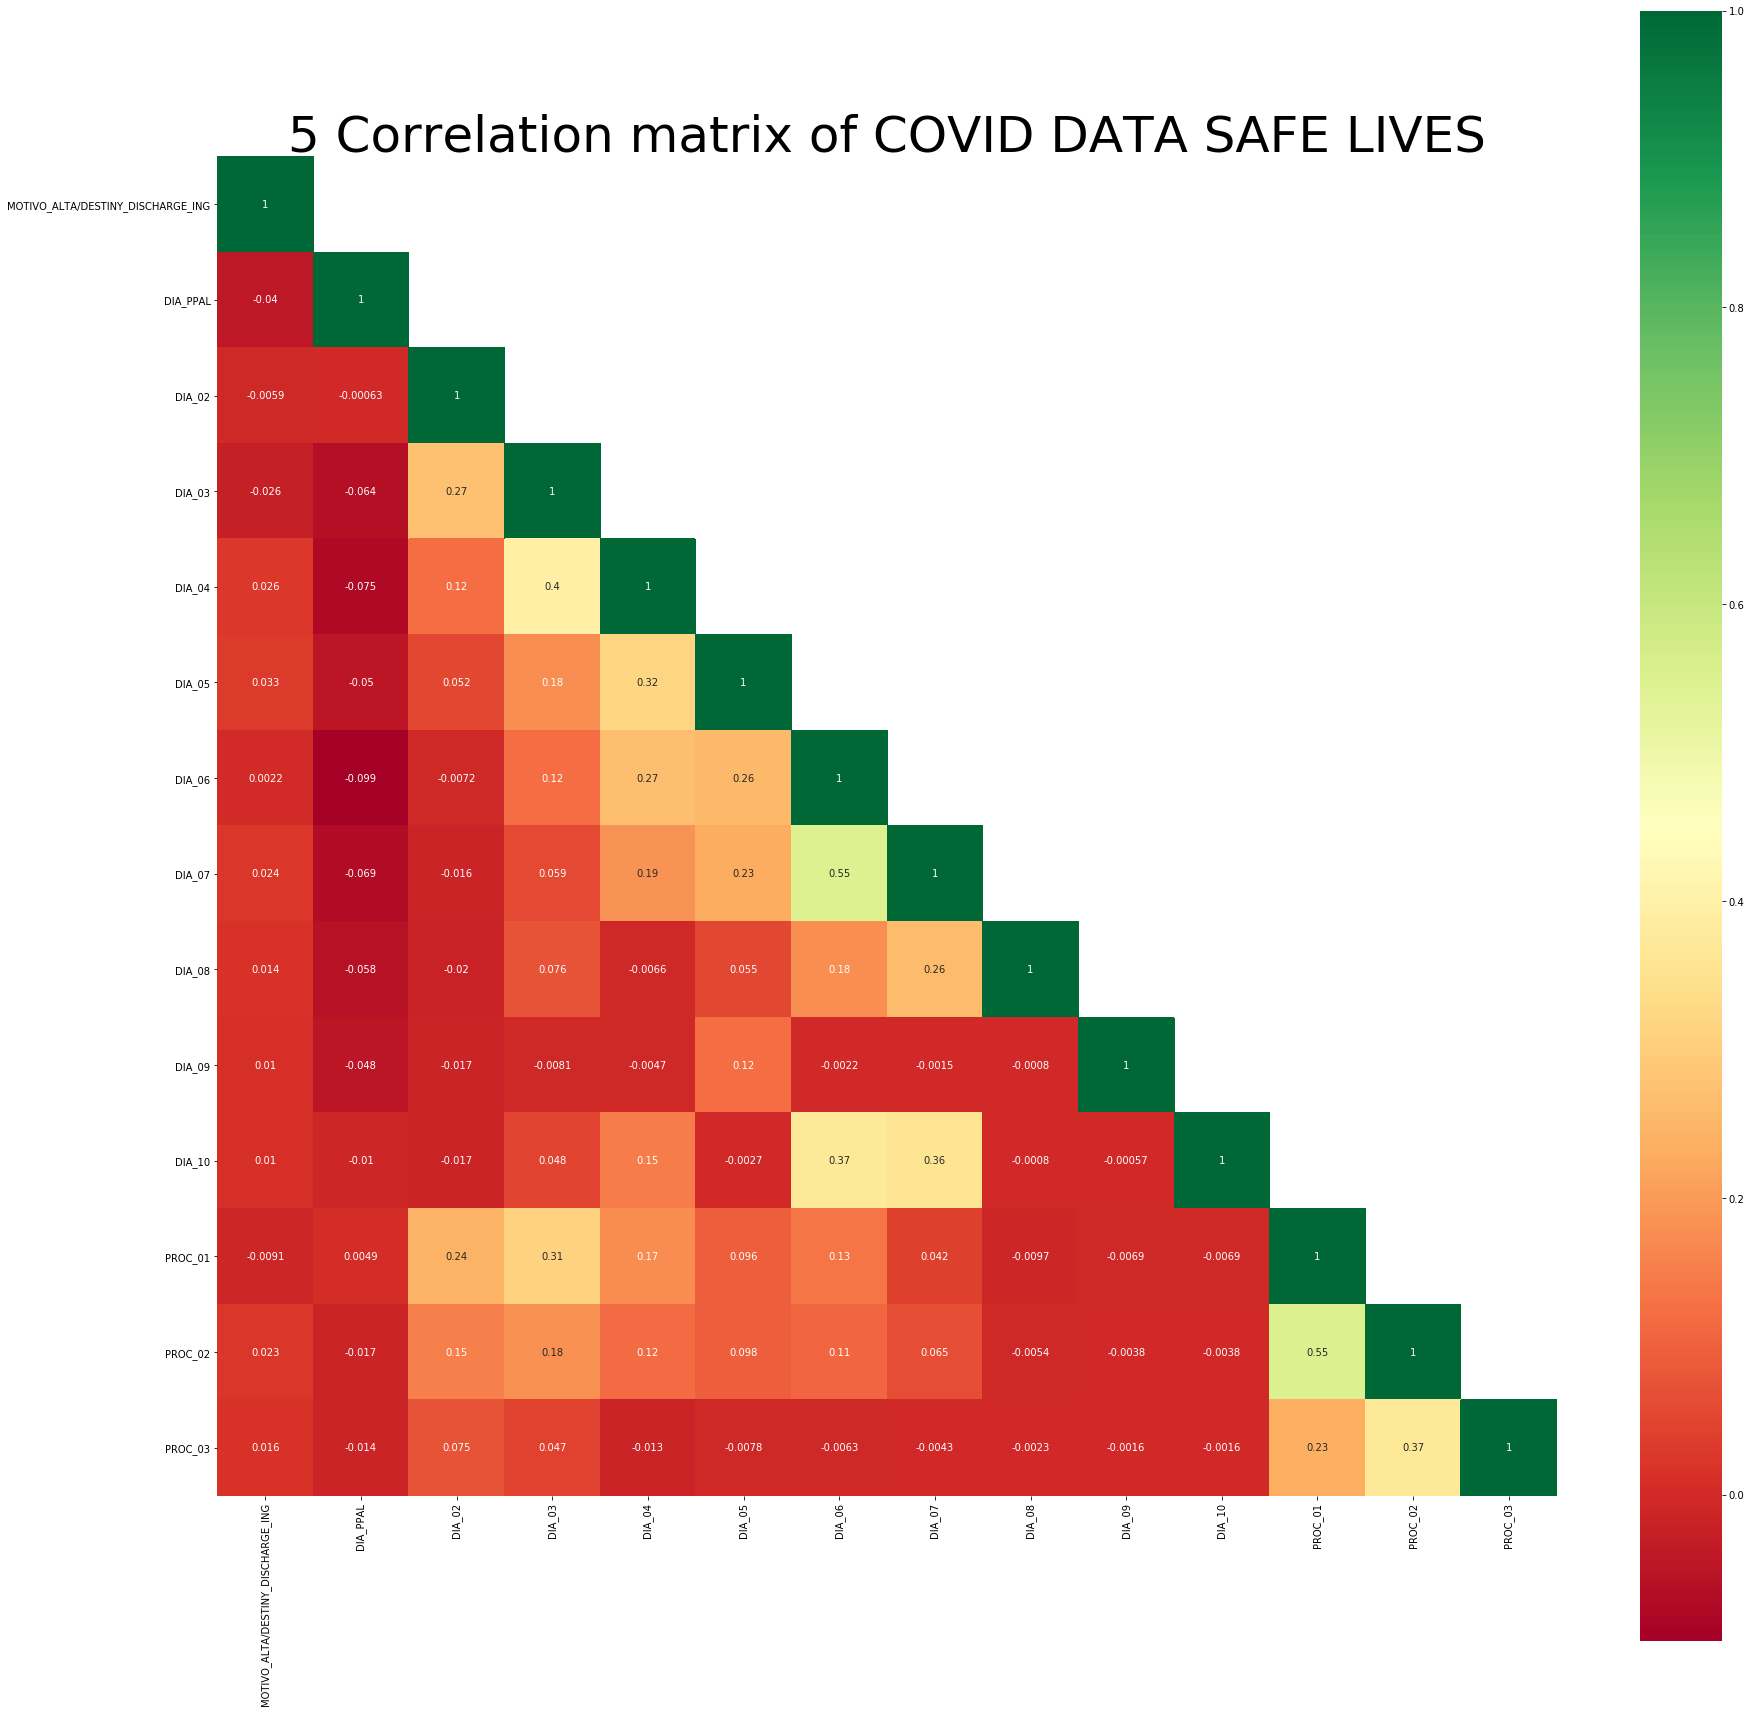

In [62]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", square=True, mask=np.triu(df.corr(), k=1))
plt.title("5 Correlation matrix of COVID DATA SAFE LIVES",fontsize=50)
plt.show()

In [64]:
df.corr()

MOTIVO_ALTA/DESTINY_DISCHARGE_ING  \
MOTIVO_ALTA/DESTINY_DISCHARGE_ING                           1.000000   
DIA_PPAL                                                   -0.040115   
DIA_02                                                     -0.005940   
DIA_03                                                     -0.025776   
DIA_04                                                      0.026362   
DIA_05                                                      0.032694   
DIA_06                                                      0.002231   
DIA_07                                                      0.023915   
DIA_08                                                      0.014419   
DIA_09                                                      0.010231   
DIA_10                                                      0.010231   
PROC_01                                                    -0.009112   
PROC_02                                                     0.022997   
PROC_03                                                     0.015798   

                                   DIA_PPAL    DIA_02    DIA_03    DIA_04  \
MOTIVO_ALTA/DESTINY_DISCHARGE_ING -0.040115 -0.005940 -0.025776  0.026362   
DIA_PPAL                           1.000000 -0.000626 -0.064145 -0.074711   
DIA_02                            -0.000626  1.000000  0.271035  0.123650   
DIA_03                            -0.064145  0.271035  1.000000  0.396612   
DIA_04                            -0.074711  0.123650  0.396612  1.000000   
DIA_05                            -0.050388  0.051855  0.179826  0.320047   
DIA_06                            -0.098806 -0.007169  0.123966  0.268254   
DIA_07                            -0.069174 -0.015583  0.058598  0.187112   
DIA_08                            -0.057787 -0.020012  0.075975 -0.006623   
DIA_09                            -0.047628 -0.016608 -0.008091 -0.004699   
DIA_10                            -0.010201 -0.016608  0.048382  0.149367   
PROC_01                            0.004915  0.241520  0.313213  0.172413   
PROC_02                           -0.016742  0.151075  0.180533  0.116015   
PROC_03                           -0.014168  0.074763  0.046852 -0.013317   

                                     DIA_05    DIA_06    DIA_07    DIA_08  \
MOTIVO_ALTA/DESTINY_DISCHARGE_ING  0.032694  0.002231  0.023915  0.014419   
DIA_PPAL                          -0.050388 -0.098806 -0.069174 -0.057787   
DIA_02                             0.051855 -0.007169 -0.015583 -0.020012   
DIA_03                             0.179826  0.123966  0.058598  0.075975   
DIA_04                             0.320047  0.268254  0.187112 -0.006623   
DIA_05                             1.000000  0.256782  0.229113  0.055408   
DIA_06                             0.256782  1.000000  0.547350  0.179811   
DIA_07                             0.229113  0.547350  1.000000  0.259162   
DIA_08                             0.055408  0.179811  0.259162  1.000000   
DIA_09                             0.121654 -0.002234 -0.001528 -0.000803   
DIA_10                            -0.002738  0.371213  0.360258 -0.000803   
PROC_01                            0.096104  0.134039  0.042000 -0.009747   
PROC_02                            0.097794  0.107357  0.065388 -0.005393   
PROC_03                           -0.007761 -0.006330 -0.004329 -0.002276   

                                     DIA_09    DIA_10   PROC_01   PROC_02  \
MOTIVO_ALTA/DESTINY_DISCHARGE_ING  0.010231  0.010231 -0.009112  0.022997   
DIA_PPAL                          -0.047628 -0.010201  0.004915 -0.016742   
DIA_02                            -0.016608 -0.016608  0.241520  0.151075   
DIA_03                            -0.008091  0.048382  0.313213  0.180533   
DIA_04                            -0.004699  0.149367  0.172413  0.116015   
DIA_05                             0.121654 -0.002738  0.096104  0.097794   
DIA_06                            -0.002234  0.371213  0.134039  0.107357   
DIA_07                    

### General

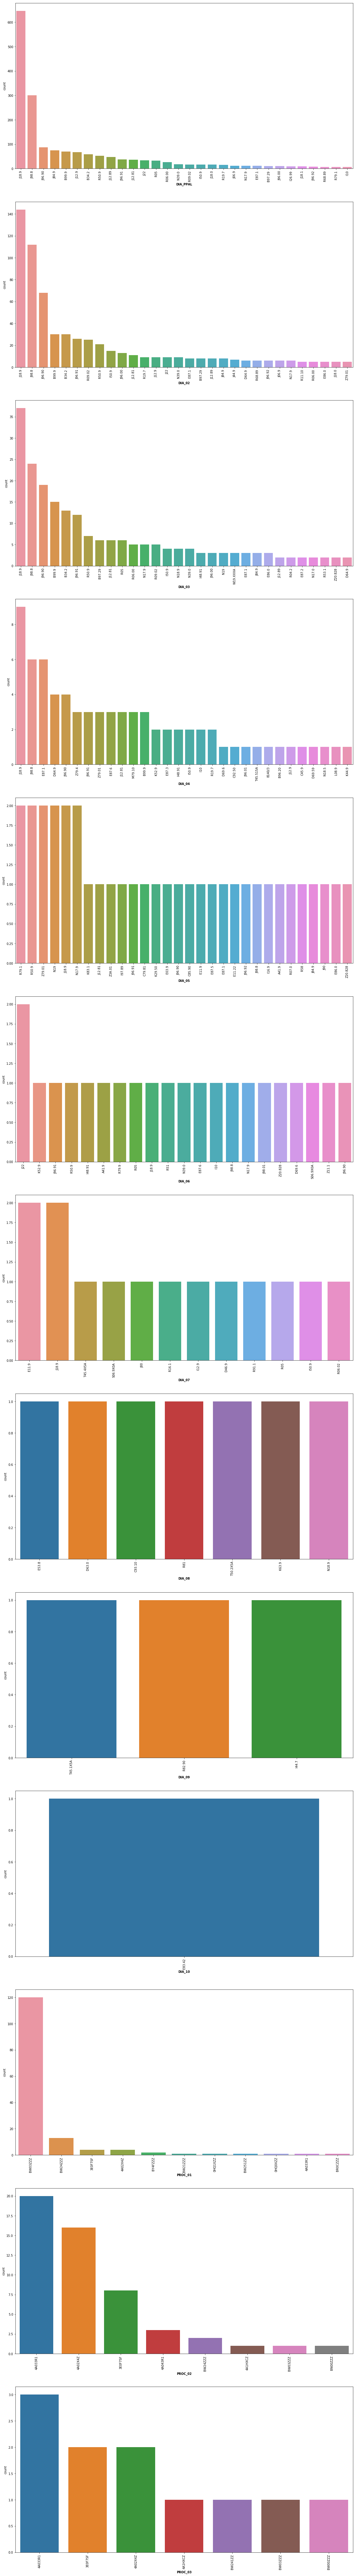

In [65]:
dib.drop('PATIENT ID', inplace=True, axis=1)
col_numeric = list(dib)
# visualizing the other categorical variables
plt.figure(figsize=(20,300))
for i,col in enumerate(col_numeric, start=1):
    plt.subplot(25,1,i)
    plt.xticks(rotation=90)
    sns.countplot(dib[col],order=dib[col].value_counts().head(30).index)
    plt.xlabel(col, fontsize=10,fontweight="bold")
plt.show()

In [66]:
for col_name in df.columns:
    print(df[col_name].value_counts(normalize=True).head(10) * 100)

1    79.669704
2    15.660592
4     2.904328
3     1.594533
0     0.170843
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
72     32.118451
95     15.432802
89      4.384966
10      3.701595
83      3.530752
68      3.416856
6       2.904328
149     2.562642
67      2.334852
90      2.050114
Name: DIA_PPAL, dtype: float64
195.0    63.496583
72.0      7.517084
95.0      5.751708
89.0      3.359909
10.0      1.480638
6.0       1.423690
90.0      1.309795
133.0     1.252847
149.0     1.195900
86.0      0.740319
Name: DIA_02, dtype: float64
195.0    88.097950
72.0      1.879271
95.0      1.082005
89.0      0.911162
6.0       0.683371
10.0      0.626424
90.0      0.512528
149.0     0.398633
9.0       0.341686
130.0     0.284738
Name: DIA_03, dtype: float64
195.0    95.558087
32.0      0.341686
72.0      0.341686
95.0      0.341686
89.0      0.227790
20.0      0.227790
66.0      0.170843
10.0      0.170843
90.0      0.170843
182.0     0.170843
Name: DIA_04, dtype: float64
195.0    98

In [67]:
s_filter = df['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']<2
e_filter =(df['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==3 )+ (df['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==4)
f_filter = df['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']==2

### Sanados

In [68]:
for col_name in df[s_filter].columns:
    print(df[s_filter][col_name].value_counts(normalize=True).head(10) * 100)

1    99.78602
0     0.21398
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
72     32.738944
95     14.835949
89      4.136947
10      3.851641
68      3.209700
83      2.995720
6       2.995720
149     2.710414
90      2.139800
66      2.068474
Name: DIA_PPAL, dtype: float64
195.0    63.480742
72.0      7.631954
95.0      5.991441
89.0      3.067047
10.0      1.569187
6.0       1.426534
90.0      1.283880
133.0     1.212553
149.0     1.141227
57.0      0.713267
Name: DIA_02, dtype: float64
195.0    88.088445
72.0      1.997147
95.0      1.212553
89.0      0.855920
90.0      0.570613
10.0      0.570613
6.0       0.570613
129.0     0.356633
149.0     0.285307
133.0     0.285307
Name: DIA_03, dtype: float64
195.0    95.292439
32.0      0.427960
72.0      0.356633
95.0      0.285307
20.0      0.285307
90.0      0.213980
89.0      0.213980
36.0      0.142653
34.0      0.142653
47.0      0.142653
Name: DIA_04, dtype: float64
195.0    98.002853
72.0      0.142653
182.0     0.142653
1

### Enfermos

In [69]:
for col_name in df[e_filter].columns:
    print(df[e_filter][col_name].value_counts(normalize=True).head(10) * 100)

4    64.556962
3    35.443038
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
72     30.379747
95     16.455696
10      6.329114
83      6.329114
6       5.063291
89      3.797468
74      3.797468
68      3.797468
122     1.265823
172     1.265823
Name: DIA_PPAL, dtype: float64
195.0    63.291139
95.0      7.594937
133.0     3.797468
89.0      3.797468
72.0      2.531646
90.0      2.531646
65.0      1.265823
10.0      1.265823
9.0       1.265823
32.0      1.265823
Name: DIA_02, dtype: float64
195.0    84.810127
72.0      2.531646
122.0     1.265823
3.0       1.265823
89.0      1.265823
6.0       1.265823
95.0      1.265823
149.0     1.265823
20.0      1.265823
10.0      1.265823
Name: DIA_03, dtype: float64
195.0    96.202532
72.0      1.265823
145.0     1.265823
67.0      1.265823
Name: DIA_04, dtype: float64
195.0    100.0
Name: DIA_05, dtype: float64
195.0    98.734177
102.0     1.265823
Name: DIA_06, dtype: float64
195.0    100.0
Name: DIA_07, dtype: float64
195.0    100.0


### Fallecidos

In [70]:
for col_name in df[f_filter].columns:
    print(df[f_filter][col_name].value_counts(normalize=True).head(10) * 100)

2    100.0
Name: MOTIVO_ALTA/DESTINY_DISCHARGE_ING, dtype: float64
72     29.454545
95     18.181818
89      5.818182
83      5.454545
67      4.727273
68      4.363636
10      2.181818
149     2.181818
90      1.818182
6       1.818182
Name: DIA_PPAL, dtype: float64
195.0    63.636364
72.0      8.363636
89.0      4.727273
95.0      4.000000
149.0     1.818182
6.0       1.818182
90.0      1.090909
67.0      1.090909
10.0      1.090909
32.0      1.090909
Name: DIA_02, dtype: float64
195.0    89.090909
9.0       1.090909
72.0      1.090909
89.0      1.090909
6.0       1.090909
120.0     0.727273
10.0      0.727273
149.0     0.727273
67.0      0.363636
90.0      0.363636
Name: DIA_03, dtype: float64
195.0    96.727273
95.0      0.727273
38.0      0.363636
137.0     0.363636
10.0      0.363636
149.0     0.363636
89.0      0.363636
66.0      0.363636
182.0     0.363636
Name: DIA_04, dtype: float64
195.0    98.909091
170.0     0.363636
27.0      0.363636
129.0     0.363636
Name: DIA_05, dtyp

## Creating Dependent and Independent Variables

In [33]:
df.applymap(str)
df.applymap(str).iloc[0,0]
df = df.applymap(str)
X = df.drop(['MOTIVO_ALTA/DESTINY_DISCHARGE_ING'],axis=1)
test_features = X.columns.to_list()
# dependent variable
y = df['MOTIVO_ALTA/DESTINY_DISCHARGE_ING']    

## Splitting data into train test data

In [34]:
# Libreria para el modelado
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

# splitting into train and test data
# I will train using 90% of the data to enhanced accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Modelling

## Decision Trees

In [35]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test,predictions)*100
print('Decision Tree Classifier Training Accuracy:', score,'%')

Decision Tree Classifier Training Accuracy: 84.42211055276381 %


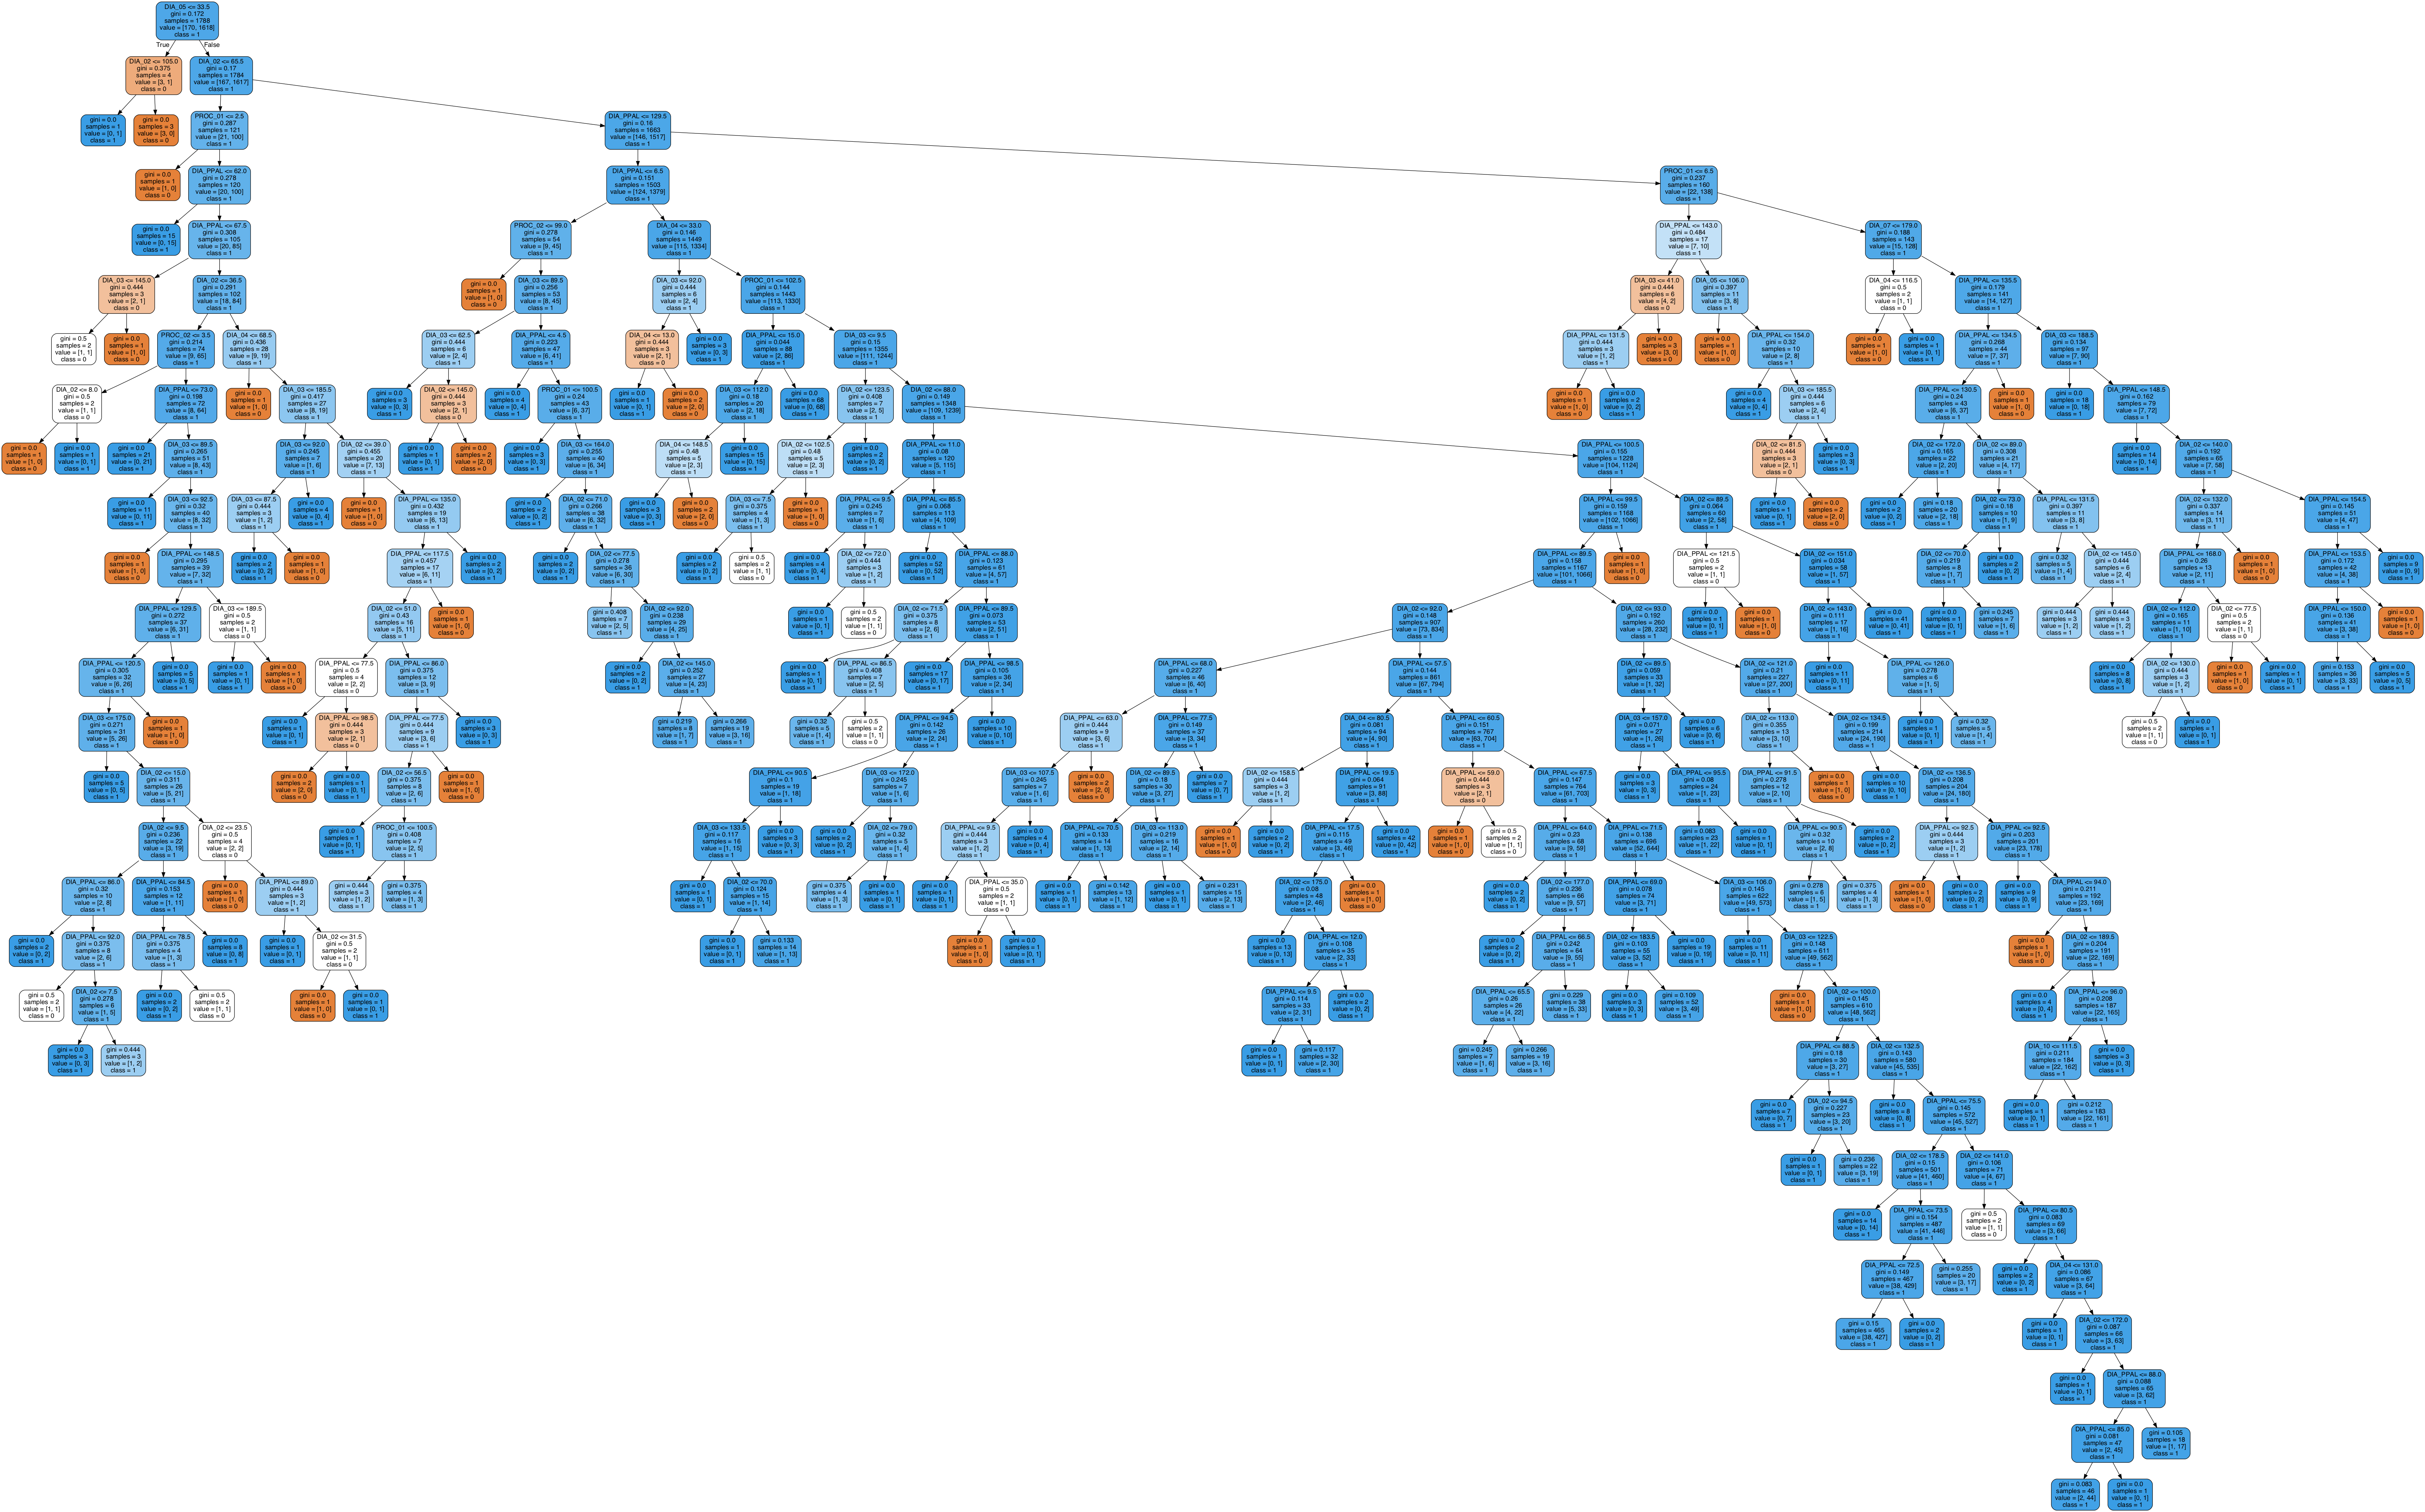

In [36]:
tree.export_graphviz(model, out_file = '5covid_decisiontree.dot')
dotfile = StringIO()
tree.export_graphviz(model, out_file=dotfile,filled = True, rounded = True, 
                    feature_names = test_features, class_names = sorted(y.unique()), label = 'all')
graph = pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png('5covid_tree.png')
Image(graph.create_png())

## Random Forest Classifier

In [37]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit(X_train,y_train)
predictions = forest.predict(X_test)
score = accuracy_score(y_test,predictions)*100
print('Random Forest Classifier Training Accuracy:', score,'%')

Random Forest Classifier Training Accuracy: 85.42713567839196 %


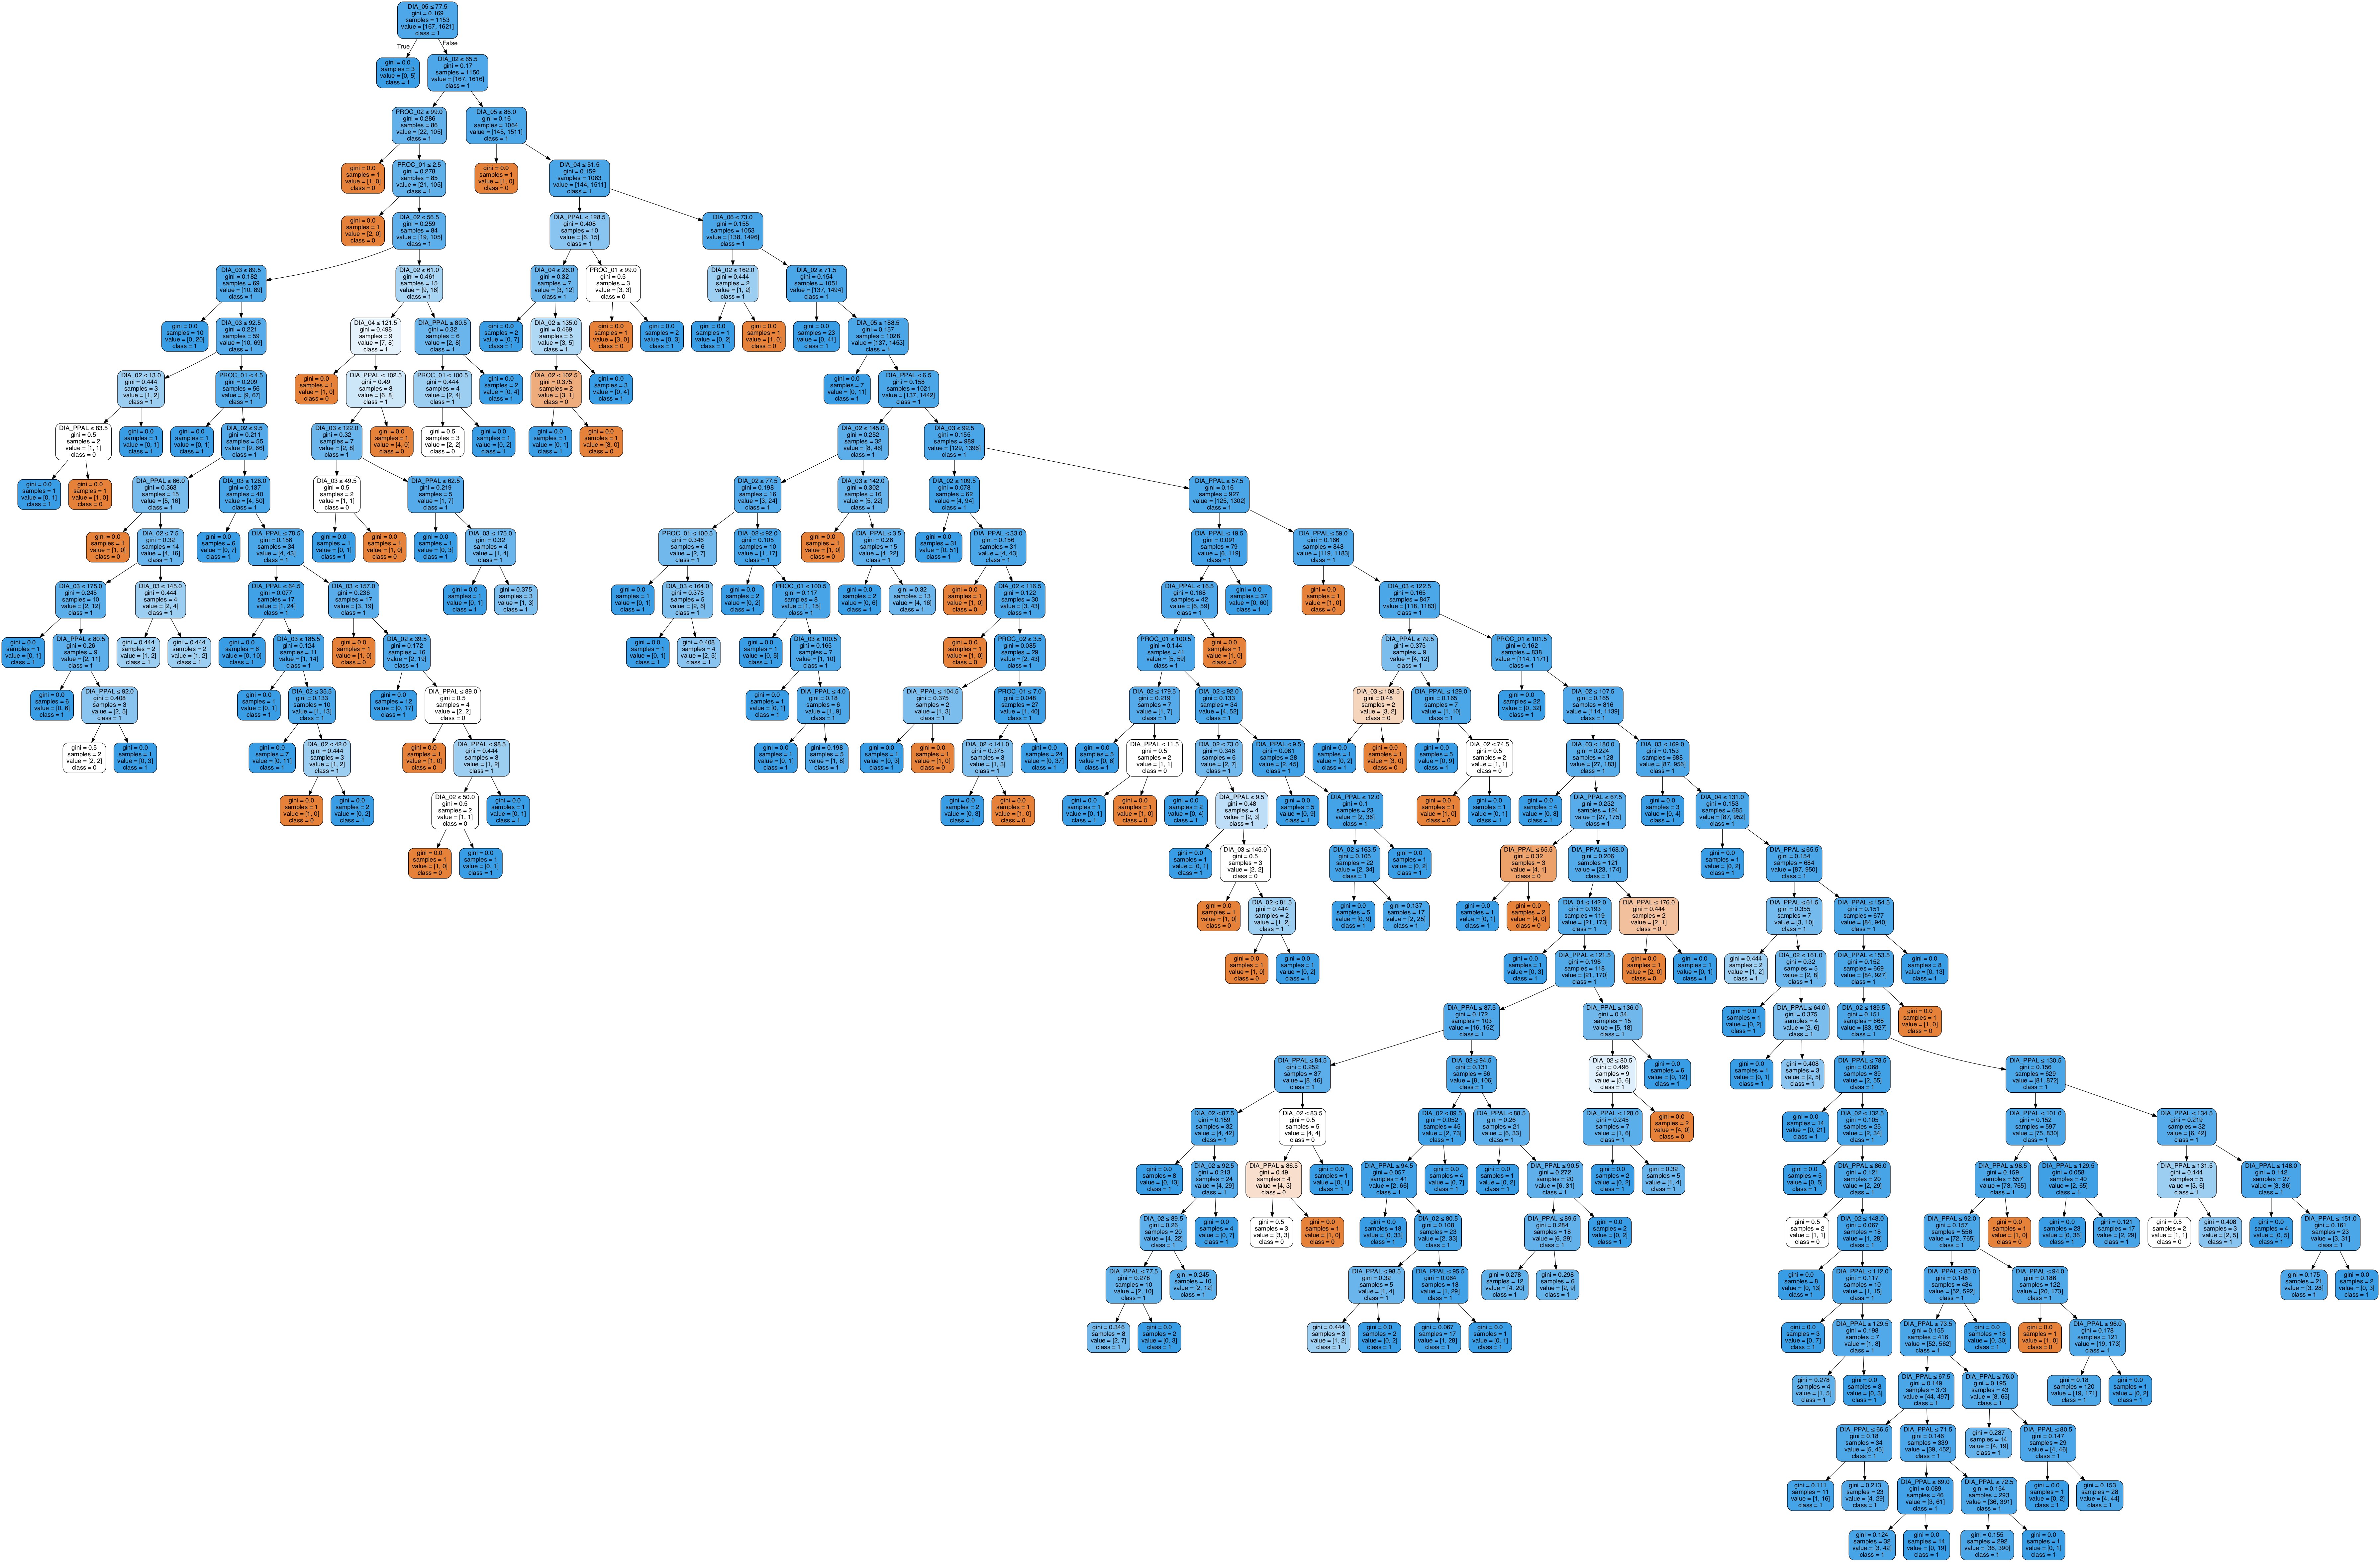

In [38]:
dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]
export_graphviz(tree, out_file = dot_data, filled = True, rounded = True, 
                    feature_names = test_features, class_names = sorted(y.unique()), label = 'all', special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('5covid_forest.png')
Image(graph.create_png())